### Galáxias barradas e interações 1

Este notebook possui cálculos para melhor caracterizar galáxias barradas interagindo com um satélite (galáxia anã). Os cálculos aqui apresentados são de: velocidade circular do satélite, centro de massa. Algumas funções importadas estão escritas em bar_funcs.py

Andressa Wille, 27/04/2023

Aqui estamos usando:

    - Galáxia com 75% de gás relaxado com SF e 20% de bojo
    - Galáxia sem gás, com 20% de bojo
    
    +
    
    - Galáxias anãs satélites
    
com massas $ M = 1 \times 10^{10}\mathrm{{M}_\odot}, M = 0.5 \times 10^{10}\mathrm{{M}_\odot}, M = 0.1 \times 10^{10}\mathrm{{M}_\odot}$ e raios orbitais de $r = 10 \, \mathrm{kpc}, r = 20 \, \mathrm{kpc}, r = 30 \, \mathrm{kpc}$.

In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
from scipy import stats
import math
from bar_funcs import *
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
plt.rc('text', usetex=True)
plt.rcParams['font.size'] = 15

In [3]:
#caminhos
path_nogas = 'snapshotJoiner/snapshot_160_b.hdf5'
path_gas = 'snapshotJoiner/snapshot_160_nb.hdf5'
paths = [path_nogas, path_gas]

In [4]:
n_snapshots = 281

In [5]:
#arrays para tempo
time_20 = np.empty(n_snapshots)
time_75r = np.empty(n_snapshots)

In [6]:
#arrays para velocidade circular
v_c_disk_75r = r_disk_75r = np.empty(n_snapshots)
v_c_halo_75r = r_halo_75r = np.empty(n_snapshots)
v_c_gas_75r = r_gas_75r = np.empty(n_snapshots)
v_c_star_75r = r_star_75r = np.empty(n_snapshots)
v_c_bulge_75r = r_bulge_75r = np.empty(n_snapshots)

v_c_disk_20 = r_disk_20 = np.empty(n_snapshots)
v_c_halo_20 = r_halo_20 = np.empty(n_snapshots)
v_c_bulge_20 = r_bulge_20 = np.empty(n_snapshots)

velocidade circular

In [7]:
for p, path in enumerate(paths):
    snapshot = path #8 Gyr

    #ler snapshot
    f = h5py.File(snapshot, 'r')
    
    #ler info disco
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    m_disk = np.array(f_disk['Masses'])
    
    #ler info halo
    f_halo = f['PartType1']

    x_halo = np.array(f_halo['Coordinates'][:,0])
    y_halo = np.array(f_halo['Coordinates'][:,1])
    z_halo = np.array(f_halo['Coordinates'][:,2])
    m_halo = np.array(f_halo['Masses'])
    
    #corrigir posição
    x_new_disk, y_new_disk, z_new_disk = shift_com(m_disk, x_disk, y_disk, z_disk)
    x_new_halo, y_new_halo, z_new_halo = shift_com(m_halo, x_halo, y_halo, z_halo)
    
    #ler info bojo
    f_bulge = f['PartType3']

    x_bulge = np.array(f_bulge['Coordinates'][:,0])
    y_bulge = np.array(f_bulge['Coordinates'][:,1])
    z_bulge = np.array(f_bulge['Coordinates'][:,2])
    m_bulge = np.array(f_bulge['Masses'])
    
    #corrigir posição
    x_new_bulge, y_new_bulge, z_new_bulge = shift_com(m_bulge, x_bulge, y_bulge, z_bulge)

    #se a galáxia também tem gás e estrelas:
    if p == 1:

        #ler info gas
        f_gas = f['PartType0']

        x_gas = np.array(f_gas['Coordinates'][:,0])
        y_gas = np.array(f_gas['Coordinates'][:,1])
        z_gas = np.array(f_gas['Coordinates'][:,2])
        m_gas = np.array(f_gas['Masses'])
        
        x_new_gas, y_new_gas, z_new_gas = shift_com(m_gas, x_gas, y_gas, z_gas)
        
        #ler info estrelas se o snapshot não for 0
        f_star = f['PartType4']

        x_star = np.array(f_star['Coordinates'][:,0])
        y_star = np.array(f_star['Coordinates'][:,1])
        z_star = np.array(f_star['Coordinates'][:,2])
        m_star = np.array(f_star['Masses'])
        
        #corrigir posição
        x_new_star, y_new_star, z_new_star = shift_com(m_star, x_star, y_star, z_star)
        

    #calcular velocidade circular
    G = 43007.1
    if p == 0:
        v_c_disk_20, r_disk_20, M_r_disk_20 = v_circ_comp(m=m_disk, x=x_new_disk, y=y_new_disk, 
                                                          z=z_new_disk, Rmax=40.0, Nbins=80)
        v_c_halo_20, r_halo_20, M_r_halo_20 = v_circ_comp(m=m_halo, x=x_new_halo, y=y_new_halo, 
                                                     z=z_new_halo, Rmax=40.0, Nbins=80)
        v_c_bulge_20, r_bulge_20, M_r_bulge_20 = v_circ_comp(m=m_bulge, x=x_new_bulge, y=y_new_bulge, 
                                                     z=z_new_bulge, Rmax=40.0, Nbins=80)
        
        M_r_tot_20 = (M_r_disk_20 + M_r_halo_20+M_r_bulge_20)
        v_c_20 = (np.sqrt(G*M_r_tot_20/r_disk_20))
        
    if p == 1:
        v_c_disk_75r, r_disk_75r, M_r_disk_75r = v_circ_comp(m=m_disk, x=x_new_disk, y=y_new_disk, 
                                                          z=z_new_disk, Rmax=40.0, Nbins=80)
        v_c_halo_75r, r_halo_75r, M_r_halo_75r = v_circ_comp(m=m_halo, x=x_new_halo, y=y_new_halo, 
                                                     z=z_new_halo, Rmax=40.0, Nbins=80)
        v_c_bulge_75r, r_bulge_75r, M_r_bulge_75r = v_circ_comp(m=m_bulge, x=x_new_bulge, y=y_new_bulge, 
                                                     z=z_new_bulge, Rmax=40.0, Nbins=80)
        v_c_gas_75r, r_gas_75r, M_r_gas_75r = v_circ_comp(m=m_gas, x=x_new_gas, y=y_new_gas, 
                                                     z=z_new_gas, Rmax=40.0, Nbins=80)
        v_c_star_75r, r_star_75r, M_r_star_75r = v_circ_comp(m=m_star, x=x_new_star, y=y_new_star,
                                                             z=z_new_star, Rmax=40.0, Nbins=80)
        
        #M_r_tot_75r = (M_r_disk_75r + M_r_halo_75r + M_r_bulge_75r + M_r_gas_75r)
        M_r_tot_75r = (M_r_disk_75r + M_r_halo_75r + M_r_bulge_75r + M_r_gas_75r + M_r_star_75r)
        v_c_75r = (np.sqrt(G*M_r_tot_75r/r_disk_75r))

In [8]:
print('Galáxia não barrada:')
raio10 = np.where(r_disk_75r == 10.0)
vel10 = round(float(v_c_75r[raio10]),2)
print(f'Se r = 12 kpc, v = {vel10} km/s')

raio20 = np.where(r_disk_75r == 20.0)
vel20 = round(float(v_c_75r[raio20]),2)
print(f'Se r = 20 kpc, v = {vel20} km/s')

raio30 = np.where(r_disk_75r == 30.0)
vel30 = round(float(v_c_75r[raio30]),2)
print(f'Se r = 30 kpc, v = {vel30} km/s')

Galáxia não barrada:
Se r = 12 kpc, v = 165.11 km/s
Se r = 20 kpc, v = 171.13 km/s
Se r = 30 kpc, v = 169.21 km/s


In [9]:
print('Galáxia barrada:')
raio10b = np.where(r_disk_20 == 10.0)
vel10b = round(float(v_c_20[raio10b]),2)
print(f'Se r = 10 kpc, v = {vel10b} km/s')

raio20b = np.where(r_disk_20 == 20.0)
vel20b = round(float(v_c_20[raio20b]),2)
print(f'Se r = 20 kpc, v = {vel20b} km/s')

raio30b = np.where(r_disk_20 == 30.0)
vel30b = round(float(v_c_20[raio30b]),2)
print(f'Se r = 30 kpc, v = {vel30b} km/s')

Galáxia barrada:
Se r = 10 kpc, v = 166.2 km/s
Se r = 20 kpc, v = 171.0 km/s
Se r = 30 kpc, v = 168.81 km/s


In [10]:
r = [r_disk_20, r_disk_75r]
v_c_disk = [v_c_disk_20, v_c_disk_75r]
v_c_halo = [v_c_halo_20, v_c_halo_75r]
v_c_bulge = [v_c_bulge_20, v_c_bulge_75r]
v_c_gas = [0, v_c_gas_75r]
v_c_star = [0, v_c_star_75r]
v_c = [v_c_20, v_c_75r]

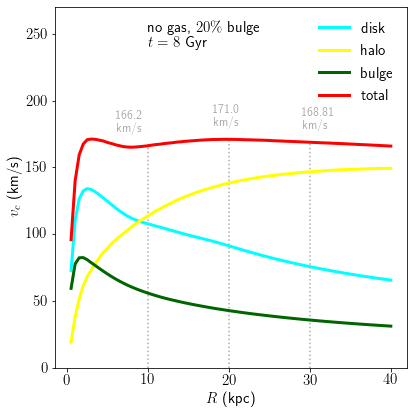

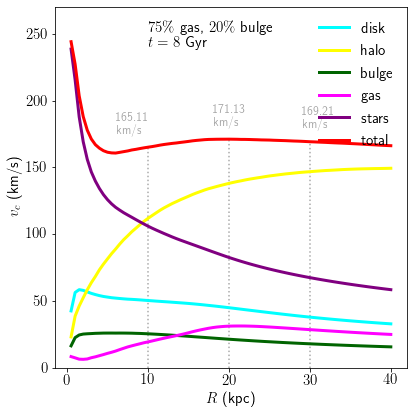

In [11]:
for i in range (0, 2):
    if i == 0:
        plt.figure(figsize=[6,6])
        plt.plot(r[i], v_c_disk[i], color='aqua', lw=3, label='disk')
        plt.plot(r[i], v_c_halo[i], color='yellow', lw=3, label='halo')
        plt.plot(r[i], v_c_bulge[i], color='darkgreen', lw=3, label='bulge')
        plt.plot(r[i], v_c[i], color='red', lw=3, label='total')
        plt.xlabel('$R$ (kpc)', fontsize=15)
        plt.ylabel('$v_c$ (km/s)', fontsize=15)
        plt.legend(frameon=False)
        plt.ylim(0, 270)
    
        text ='no gas, $20\%$ bulge\n $t=8$ Gyr'
        plt.text(10, 240, text, fontsize=15)
        
        plt.vlines(10, 0, vel10b, 'darkgrey', linestyles='dotted')
        plt.annotate(f'{vel10b}\n km/s', xy=(6, vel10b+10), fontsize=12, color='darkgrey')
        plt.vlines(20, 0, vel20b, 'darkgrey', linestyles='dotted')
        plt.annotate(f'{vel20b}\n km/s', xy=(18, vel20b+10), fontsize=12, color='darkgrey')
        plt.vlines(30, 0, vel30b, 'darkgrey', linestyles='dotted')
        plt.annotate(f'{vel30b}\n km/s', xy=(29, vel30b+10), fontsize=12, color='darkgrey')

    if i == 1:
        plt.figure(figsize=[6,6])
        plt.plot(r[i], v_c_disk[i], color='aqua', lw=3, label='disk')
        plt.plot(r[i], v_c_halo[i], color='yellow', lw=3, label='halo')
        plt.plot(r[i], v_c_bulge[i], color='darkgreen', lw=3, label='bulge')
        plt.plot(r[i], v_c_gas[i], color='magenta', lw=3, label='gas')
        plt.plot(r[i], v_c_star[i], color='purple', lw=3, label='stars')
        plt.plot(r[i], v_c[i], color='red', lw=3, label='total')
        plt.xlabel('$R$ (kpc)', fontsize=15)
        plt.ylabel('$v_c$ (km/s)', fontsize=15)
        plt.legend(frameon=False)
        plt.ylim(0, 270)
    
        text ='$75\%$ gas, $20\%$ bulge\n $t=8$ Gyr'
        plt.text(10, 240, text, fontsize=15)
        
        plt.vlines(10, 0, vel10, 'darkgrey', linestyles='dotted')
        plt.annotate(f'{vel10}\n km/s', xy=(6, vel10+10), fontsize=12, color='darkgrey')
        plt.vlines(20, 0, vel20, 'darkgrey', linestyles='dotted')
        plt.annotate(f'{vel20}\n km/s', xy=(18, vel20+10), fontsize=12, color='darkgrey')
        plt.vlines(30, 0, vel30, 'darkgrey', linestyles='dotted')
        plt.annotate(f'{vel30}\n km/s', xy=(29, vel30+10), fontsize=12, color='darkgrey')

    
    plt.tight_layout()
    #plt.savefig(f'vc_sat{i}.png')

check centro de massa

In [12]:
for p, path in enumerate(paths):
    snapshot = path #'snapshot_000.hdf5'

    #ler snapshot
    f = h5py.File(snapshot, 'r')
    
    time = round(f['Header'].attrs['Time'], 2)
    
    #ler info disco e calcular COM
    f_disk = f['PartType2']

    x_disk = np.array(f_disk['Coordinates'][:,0])
    y_disk = np.array(f_disk['Coordinates'][:,1])
    z_disk = np.array(f_disk['Coordinates'][:,2])
    m_disk = np.array(f_disk['Masses'])
    
    cm_x, cm_y, cm_z = com(m=m_disk, x=x_disk, y=y_disk, z=z_disk)
    
    vx_disk = np.array(f_disk['Velocities'][:,0])
    vy_disk = np.array(f_disk['Velocities'][:,1])
    vz_disk = np.array(f_disk['Velocities'][:,2])
    
    cm_vx, cm_vy, cm_vz = com(m=m_disk, x=vx_disk, y=vy_disk, z=vz_disk)
    
    if p == 0:
        print(f'Centro de massa da galáxia barrada em {time} Gyr:')
        print(f'x = {cm_x} kpc\ny = {cm_y} kpc\nz = {cm_z} kpc')
        print(f'vx = {cm_vx} km/s\nvy = {cm_vy} km/s\nvz = {cm_vz} km/s \n')
    if p == 1:
        print(f'Centro de massa da galáxia não barrada em {time} Gyr:')
        print(f'x = {cm_x} kpc\ny = {cm_y} kpc\nz = {cm_z} kpc')
        print(f'vx = {cm_vx} km/s\nvy = {cm_vy} km/s\nvz = {cm_vz} km/s \n')

Centro de massa da galáxia barrada em 8.0 Gyr:
x = -8.956934749448919e-08 kpc
y = 4.4784673747244597e-08 kpc
z = -6.57774847923065e-08 kpc
vx = 1.5525353092016303e-06 km/s
vy = -9.554063353789388e-07 km/s
vz = 5.4581320796387445e-08 km/s 

Centro de massa da galáxia não barrada em 8.0 Gyr:
x = 7.464114659683219e-09 kpc
y = 8.956936881077127e-08 kpc
z = 0.0 kpc
vx = 0.0 km/s
vy = -1.194258345549315e-07 km/s
vz = 1.6421051896031713e-07 km/s 

